In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

file = "Analysis Scripts/Ta2Output_Test.csv"
#file = "Analysis Scripts/MnOutput.csv"
latticeSizes = [20]
global_CSVData = pd.read_csv(file, sep=',', index_col=0)
#global_CSVData.index = global_CSVData.index / 2.5

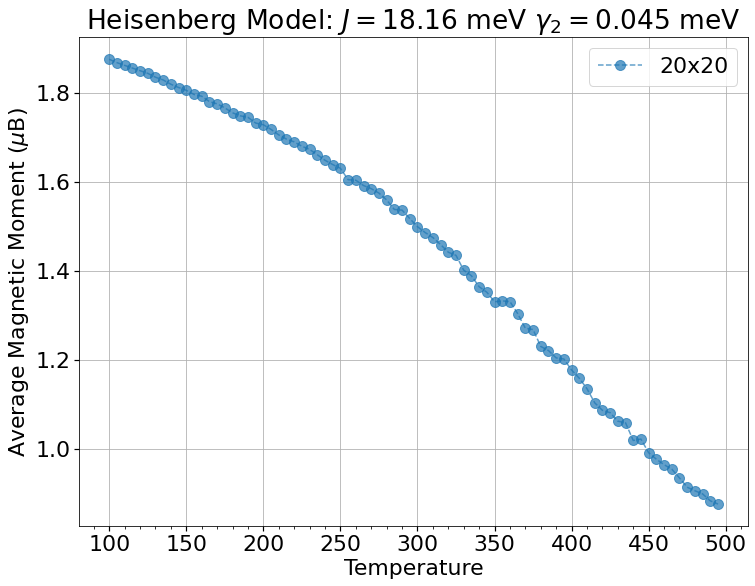

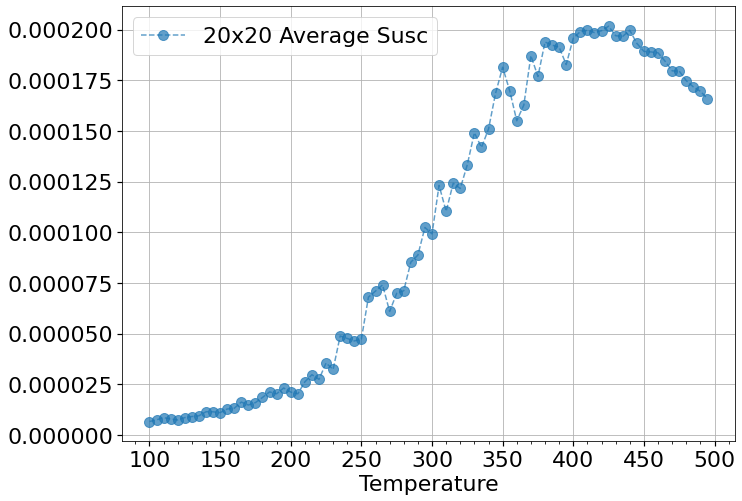

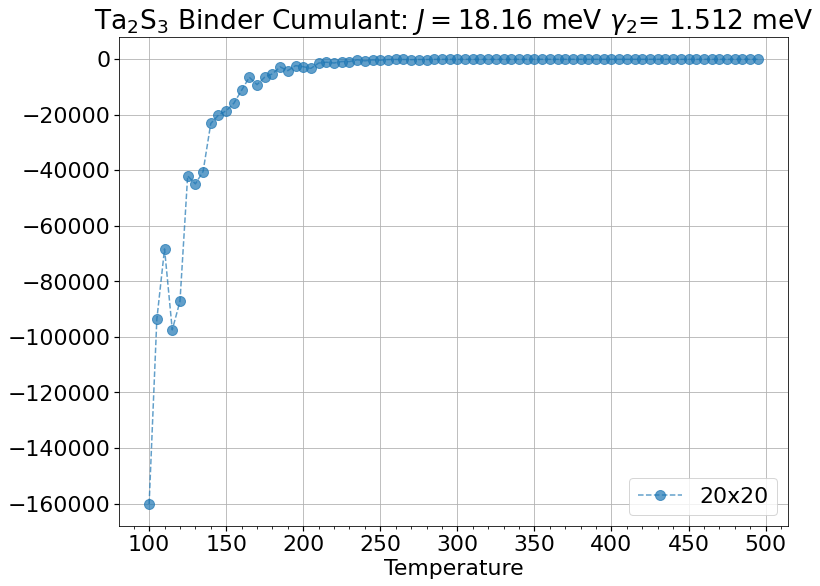

In [47]:
plt.rcParams.update({"font.size":22})

fig, ax = plt.subplots(figsize = (12,9))
fig2, ax2 = plt.subplots(figsize = (11,8))
fig3, ax3 = plt.subplots(figsize = (12,9))

#ax.set_xlim(0, 200)
#ax3.set_ylim(-2000, -2)

#ax.set_title(r"Comparison of Models")
#ax2.set_title(r"Heisenberg Model: Axis Anisotropy = 4.5 meV/m$^2$")

ax.set_ylabel(r"Average Magnetic Moment ($\mu$B)")

for i in latticeSizes:
    if i == 80:
        span = 2
    elif i == 40:
        span = 1
    else:
        span = 1
    global_CSVData["{}x{} Average U2".format(i,i)] = global_CSVData["{}x{} Average U2".format(i,i)].ewm(span=span).mean()
    global_CSVData["{}x{} Average Magnetic Moment".format(i,i)] = global_CSVData["{}x{} Average Magnetic Moment".format(i,i)].ewm(span=span).mean()
    global_CSVData["{}x{} Average Susc".format(i,i)] = global_CSVData["{}x{} Average Susc".format(i,i)].ewm(span=span).mean()
    
    
    global_CSVData.plot(y = "{}x{} Average Magnetic Moment".format(i,i), 
                        ax=ax, grid=True, alpha=0.7,
                        marker='o',
                        linestyle = 'dashed',
                        markersize=10
                        #yerr = "{}x{} Magnetic Moment std".format(i,i),
                        #capsize = 4, color = 'black'
                       )
    global_CSVData.plot(y = "{}x{} Average Susc".format(i,i), 
                        ax=ax2, grid=True, alpha=0.7,
                        marker='o',
                        markersize = 10,
                        linestyle = 'dashed'
                       )
    global_CSVData.plot(y = "{}x{} Average U2".format(i,i), 
                        ax=ax3, grid=True, alpha=0.7, 
                        marker='o',
                        markersize = 10,
                        linestyle = 'dashed'
                       )

ax.set_title(r"Heisenberg Model: $J = 18.16$ meV $\gamma_2 = 0.045$ meV")
ax3.set_title(r"$\mathrm{Ta_2 S_3}$ Binder Cumulant: $J = 18.16$ meV $\gamma_2 $= 1.512 meV")

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', length=3, color='black', width = 0.8)
ax.tick_params(which='major', length=5, color='black', width = 1.2)


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='minor', length=3, color='black', width = 0.8)
ax2.tick_params(which='major', length=5, color='black', width = 1.2)


ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='minor', length=3, color='black', width = 0.8)
ax3.tick_params(which='major', length=5, color='black', width = 1.2)

    
ax.legend(['20x20', '40x40', '80x80'])
ax3.legend(['20x20', '40x40', '80x80'])
#ax2.legend(['Ising Model: {+3, -3}', r'Heisenberg Model: J$_{\mathrm{axis}}$ = 4.5meV'])